<a href="https://colab.research.google.com/github/uichann/My_Repository/blob/main/Simple_ITK_practise_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/FlashChoi5657/Deepnoid-Education.git

Cloning into 'Deepnoid-Education'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 556 (delta 42), reused 175 (delta 8), pack-reused 333
Receiving objects: 100% (556/556), 156.41 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (109/109), done.
Checking out files: 100% (332/332), done.


In [2]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 195 kB/s 


In [3]:
import SimpleITK as sitk
import numpy as np
import os
import matplotlib.pyplot as plt

#### data load 및 확인

In [4]:
image_2d = sitk.Image(64, 64, sitk.sitkFloat32)

In [5]:
print(image_2d)

Image (0x26b4000)
  RTTI typeinfo:   itk::Image<float, 2u>
  Reference Count: 1
  Modified Time: 1666
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [64, 64]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [64, 64]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [64, 64]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x31c0cd0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 1667
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x2d04000
      Container

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


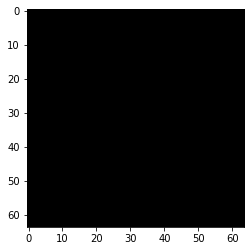

In [6]:
img_npy = sitk.GetArrayFromImage(image_2d)

print(img_npy)
plt.imshow(img_npy, cmap='gray')
plt.show()

In [7]:
path = os.path.join('.','Deepnoid-Education/dataset')
filelist = os.listdir(path)
filelist

['label.nii.gz',
 'data.nii.gz',
 'xray_abd_chest',
 'test.dcm',
 'MRI',
 'lung_cancer',
 'test2.dcm']

In [8]:
dcm = sitk.ReadImage('./Deepnoid-Education/dataset/test2.dcm')
print(dcm)

Image (0x3461700)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 1875
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1857
  UpdateMTime: 1871
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [2300, 2978, 1]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [2300, 2978, 1]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [2300, 2978, 1]
  Spacing: [0.143, 0.143, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.143 0 0
0 0.143 0
0 0 1

  PointToIndexMatrix: 
6.99301 0 0
0 6.99301 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x31c3250)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>
      Reference Count: 1
      

In [9]:
arr = sitk.GetArrayFromImage(dcm)
arr.shape

(1, 2978, 2300)

In [ ]:
plt.imshow(arr, cmap='gray')
plt.show()

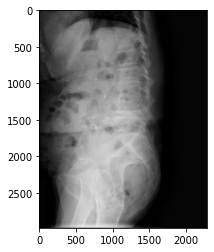

In [ ]:
arr = np.squeeze(arr) # 길이가 1인 축 제거
plt.imshow(arr, cmap='gray')
# plt.axis('off')
plt.show()

#### Dicom tags
https://www.dicomlibrary.com/dicom/dicom-tags/


In [11]:
for key in dcm.GetMetaDataKeys():
  value = dcm.GetMetaData(key)
  print(key, value)

0008|0005 ISO_IR 100
0008|0008 DERIVED\PRIMARY 
0008|0016 1.2.840.10008.5.1.4.1.1.1
0008|0018 1.3.46.670589.26.802251.4.20150709.141029.375486.0
0008|0020 20150709
0008|0021 20150709
0008|0023 20150709
0008|0030 140925
0008|0031 140922
0008|0033 140922
0008|0050 1500426505
0008|0060 CR
0008|0070 Philips Medical Systems 
0008|0080 Boramae Medical Center
0008|0090 GIM^O HO
0008|1010 Digital Diagnost
0008|103e L-S Spine Standing Lat
0008|1070 Sabre 
0008|1090 VS 2
0010|0010 ANONYMIZED
0010|0020 ANONYMIZED
0010|0030 UNKNOWN
0010|0040 F 
0010|1020 0.000 
0010|1030 0.000 
0010|2000 
0010|2110 
0018|0015 LSPINE
0018|0060 85.000
0018|1000 08.02.251 
0018|1020 Version 1.5.3.1 
0018|1110 1100.000
0018|1150 43
0018|1152 40
0018|115e 42.935
0018|1160 0mmAl 
0018|1164 0.143\0.143 
0018|1166 IN
0018|1170 50
0018|1180 None
0018|1190 2.000 
0018|1200 20150401
0018|1201 185414
0018|1260 PIXIUM 4600 
0018|1400 P=fullField,s: CD=1.10 G=2.50 C=3.00 N=0.00 
0018|5020 6000,-1,2381,5903,6333,19136,30000,3000

In [ ]:
arr.dtype

dtype('uint16')

#### Threshold

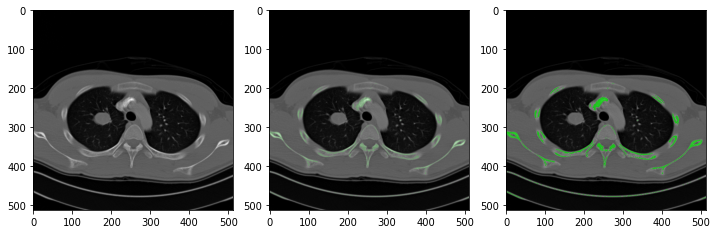

In [12]:
lung = sitk.ReadImage('./Deepnoid-Education/dataset/test.dcm')
lung_arr = sitk.GetArrayFromImage(lung)
threshold = 500 # 500, 250
th_img = lung>threshold
CT_255 = sitk.Cast(sitk.RescaleIntensity(lung), sitk.sitkUInt8)
overlay = sitk.GetArrayFromImage(sitk.LabelOverlay(CT_255, th_img, opacity=0.2))
overlay1 = sitk.GetArrayFromImage(sitk.LabelOverlay(CT_255, th_img, opacity=0.8))

fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(lung_arr[0], cmap='gray')
plt.subplot(132)
plt.imshow(overlay[0], cmap='gray')
plt.subplot(133)
plt.imshow(overlay1[0], cmap='gray')
fig.tight_layout()
plt.show()

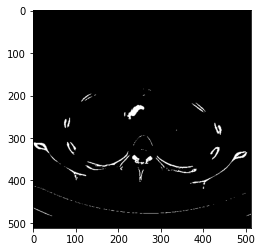

In [13]:
th_arr = sitk.GetArrayFromImage(th_img)
plt.imshow(th_arr[0], cmap='gray')
plt.show()

In [14]:
# SimpleITK 라이브러리의 사용이 심플하지는 않습니다. 라이브러리 안에 여러 함수들이 있고
# 그 함수들을 불러와서 사용할 때도 여러 설정 값이 필요합니다.
# 설정을 마치고 Execute로 실행해야 합니다.

def series_load(path):
    dicoms = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(path)
    reader = sitk.ImageSeriesReader() 
    reader.LoadPrivateTagsOn() 
    reader.MetaDataDictionaryArrayUpdateOn()
    reader.SetFileNames(dicoms)
    image3D = reader.Execute()

    return image3D

In [15]:
for a, b, c in os.walk(path, topdown=True):
  print(a,b,c)

./Deepnoid-Education/dataset ['xray_abd_chest', 'MRI', 'lung_cancer'] ['label.nii.gz', 'data.nii.gz', 'test.dcm', 'test2.dcm']
./Deepnoid-Education/dataset/xray_abd_chest ['TRAIN', 'TEST', 'VAL'] []
./Deepnoid-Education/dataset/xray_abd_chest/TRAIN ['openI_abd_xray', 'openI_CXR'] []
./Deepnoid-Education/dataset/xray_abd_chest/TRAIN/openI_abd_xray [] ['PMC3736546_CRIM.SURGERY2013-359871.001.png', 'PMC3432226_biij-08-e7-g01.png', 'openI_11.png', 'openI_6.png', 'PMC4594448_pr-2015-3-5999-g001.png', 'openI_13.png', 'PMC3913410_umj0082-0179-f4.png', 'PMC2803977_1757-1626-2-9314-1.png', 'openI_9.png', 'openI_8.png', 'PMC3173928_JPN-6-87-g002.png', 'PMC3298222_wjem-13-01-20w-f01.png', 'openI_2.png', 'openI_17.png', 'PMC4390781_rjv04101.png', 'PMC3598892_1756-0500-6-63-1.png', 'PMC4481078_13256_2015_608_Fig1_HTML.png', 'PMC3860047_gr1.png', 'openI_12.png', 'openI_16.png', 'openI_7.png', 'openI_10.png', 'openI_4.png', 'PMC3913410_umj0082-0179-f3.png', 'openI_1.png', 'openI_15.png', 'openI_14.pn

In [16]:
mri_series = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644')
print(mri_series)

Image (0x5ea3c80)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 3373
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 2456
  UpdateMTime: 3369
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [260, 320, 24]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [260, 320, 24]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [260, 320, 24]
  Spacing: [0.6875, 0.6875, 6.5]
  Origin: [-83.3003, -115.806, -61.4529]
  Direction: 
0.998081 -1.68246e-11 -0.0619294
0.010241 0.986232 0.165048
0.0610768 -0.165365 0.984339

  IndexToPointMatrix: 
0.68618 -1.15669e-11 -0.402541
0.00704066 0.678035 1.07281
0.0419903 -0.113688 6.39821

  PointToIndexMatrix: 
1.45175 0.0148959 0.0888389
-2.44721e-11 1.43452 -0.240531
-0.0095276 0.0253919 0.151

In [17]:
mri_arr = sitk.GetArrayFromImage(mri_series)
print(mri_arr.shape)

(24, 320, 260)


In [ ]:
axes=[]
fig = plt.figure(figsize=(15,30))
for i in range(24):
  axes.append(fig.add_subplot(6,4,i+1))
  plt.imshow(mri_arr[i], cmap='gray')
fig.tight_layout()
plt.show()

In [19]:
def display(array):
  axes=[]
  fig = plt.figure(figsize=(20,20))
  for i in range(24):
    axes.append(fig.add_subplot(6,4,i+1))
    plt.imshow(array[i], cmap='gray')
  fig.tight_layout()
  plt.show()

#### Min-Max normalization

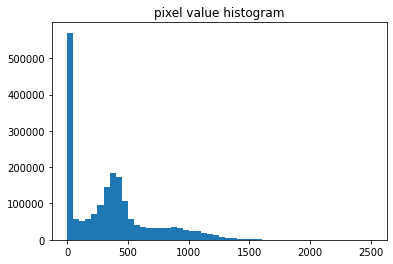

In [20]:
plt.hist(mri_arr.flatten(), bins=50)
plt.title("pixel value histogram")
plt.show()

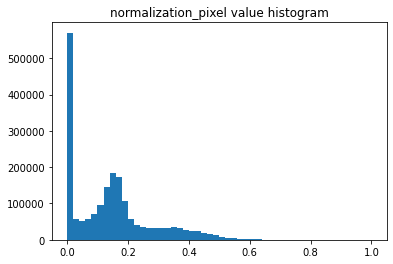

In [21]:
# Min-Max scaling

mri_arr_norm = (mri_arr - np.min(mri_arr)) / (np.max(mri_arr) - np.min(mri_arr))
plt.hist(mri_arr_norm.flatten(), bins=50)
plt.title("normalization_pixel value histogram")
plt.show()

#### 픽셀 간격 조정

In [22]:
mri_series = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644')
print(mri_series.GetSize(), mri_series.GetSpacing())
rate = 2 # rate = 0.5

resamplefilter = sitk.ResampleImageFilter()
resamplefilter.SetInterpolator(sitk.sitkLinear) #sitk.sitkNearestNeighbor, sitk.sitkBSpline, sitk.sitkGaussian
resamplefilter.SetOutputDirection(mri_series.GetDirection())
resamplefilter.SetOutputOrigin(mri_series.GetOrigin())

x, y, z = mri_series.GetSpacing()
resamplefilter.SetOutputSpacing((x*rate, y*rate, z))

width, height, depth = mri_series.GetSize()
resamplefilter.SetSize((width//rate, height//rate, depth))
new_img = resamplefilter.Execute(mri_series)
print(new_img.GetSize(), new_img.GetSpacing())

(260, 320, 24) (0.6875, 0.6875, 6.499999911226572)
(130, 160, 24) (1.375, 1.375, 6.499999911226572)


In [23]:
new_series_arr = sitk.GetArrayFromImage(new_img)
new_series_arr.shape

(24, 160, 130)

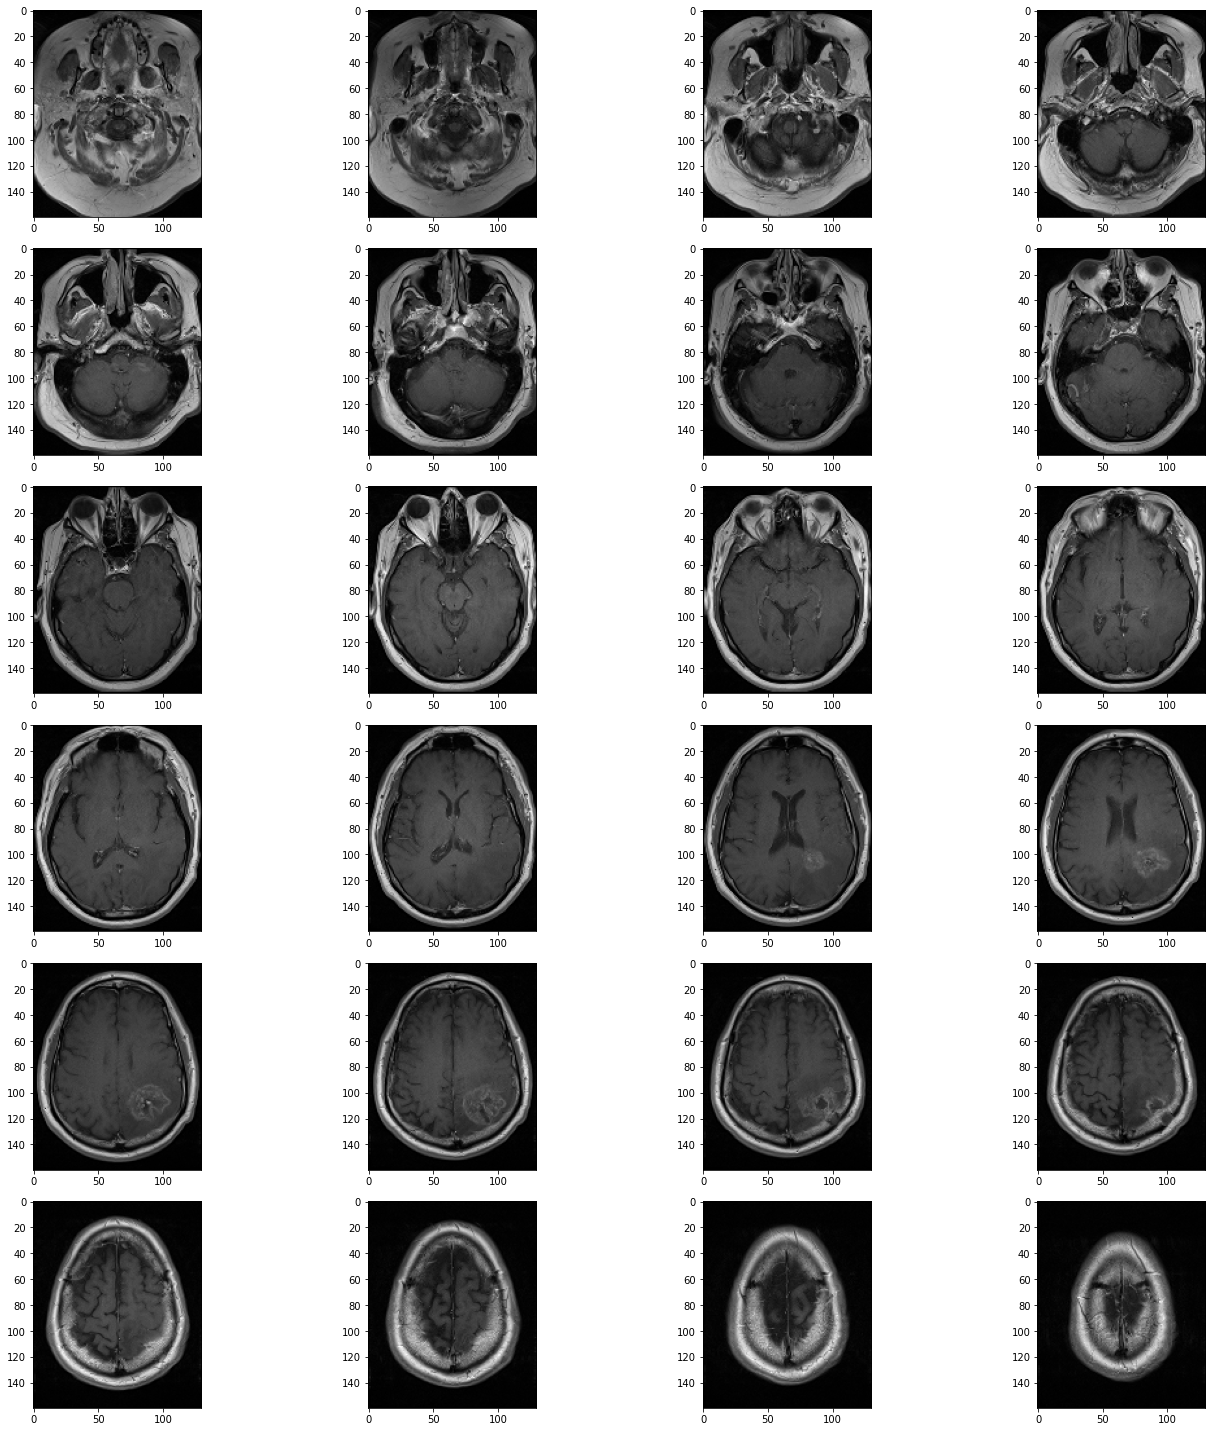

In [24]:
display(new_series_arr)

In [27]:
mri_series_T2 = series_load('./Deepnoid-Education/dataset/MRI/37908.000000-T2reg-21119')
T2_arr = sitk.GetArrayFromImage(mri_series_T2)
print(mri_series_T2.GetSize(), mri_series_T2.GetSpacing())

(260, 320, 24) (0.6875, 0.6875, 6.499999911226572)


In [28]:
# Resample
def resample_array(sitk_image, spacing, interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [spacing, spacing, spacing]
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in
                zip(original_size, original_spacing, new_spacing)]
    sitk_image = sitk.Resample(sitk_image, new_size, sitk.Transform(), interpolator, 
                               sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

resampled_img = resample_array(mri_series_T2, 1)

In [29]:
print(resampled_img.GetSize(), resampled_img.GetSpacing())

(179, 220, 156) (1.0, 1.0, 1.0)


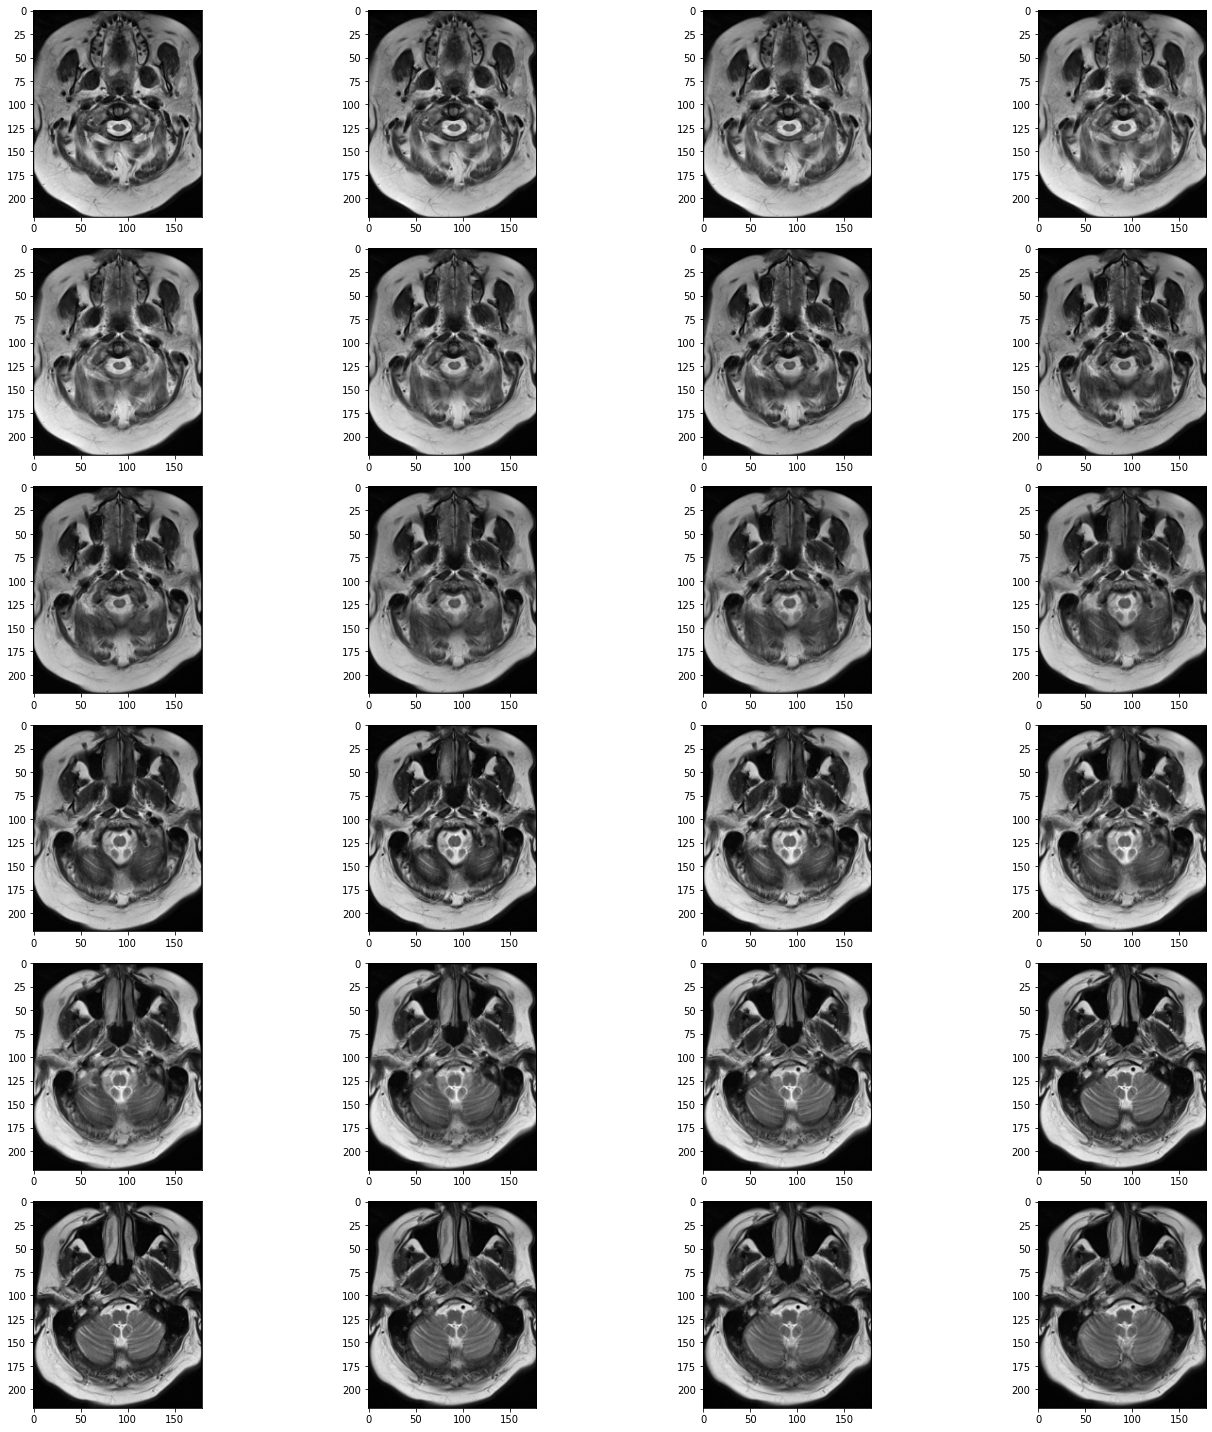

In [38]:
display(sitk.GetArrayFromImage(resampled_img))

(220, 156, 179)


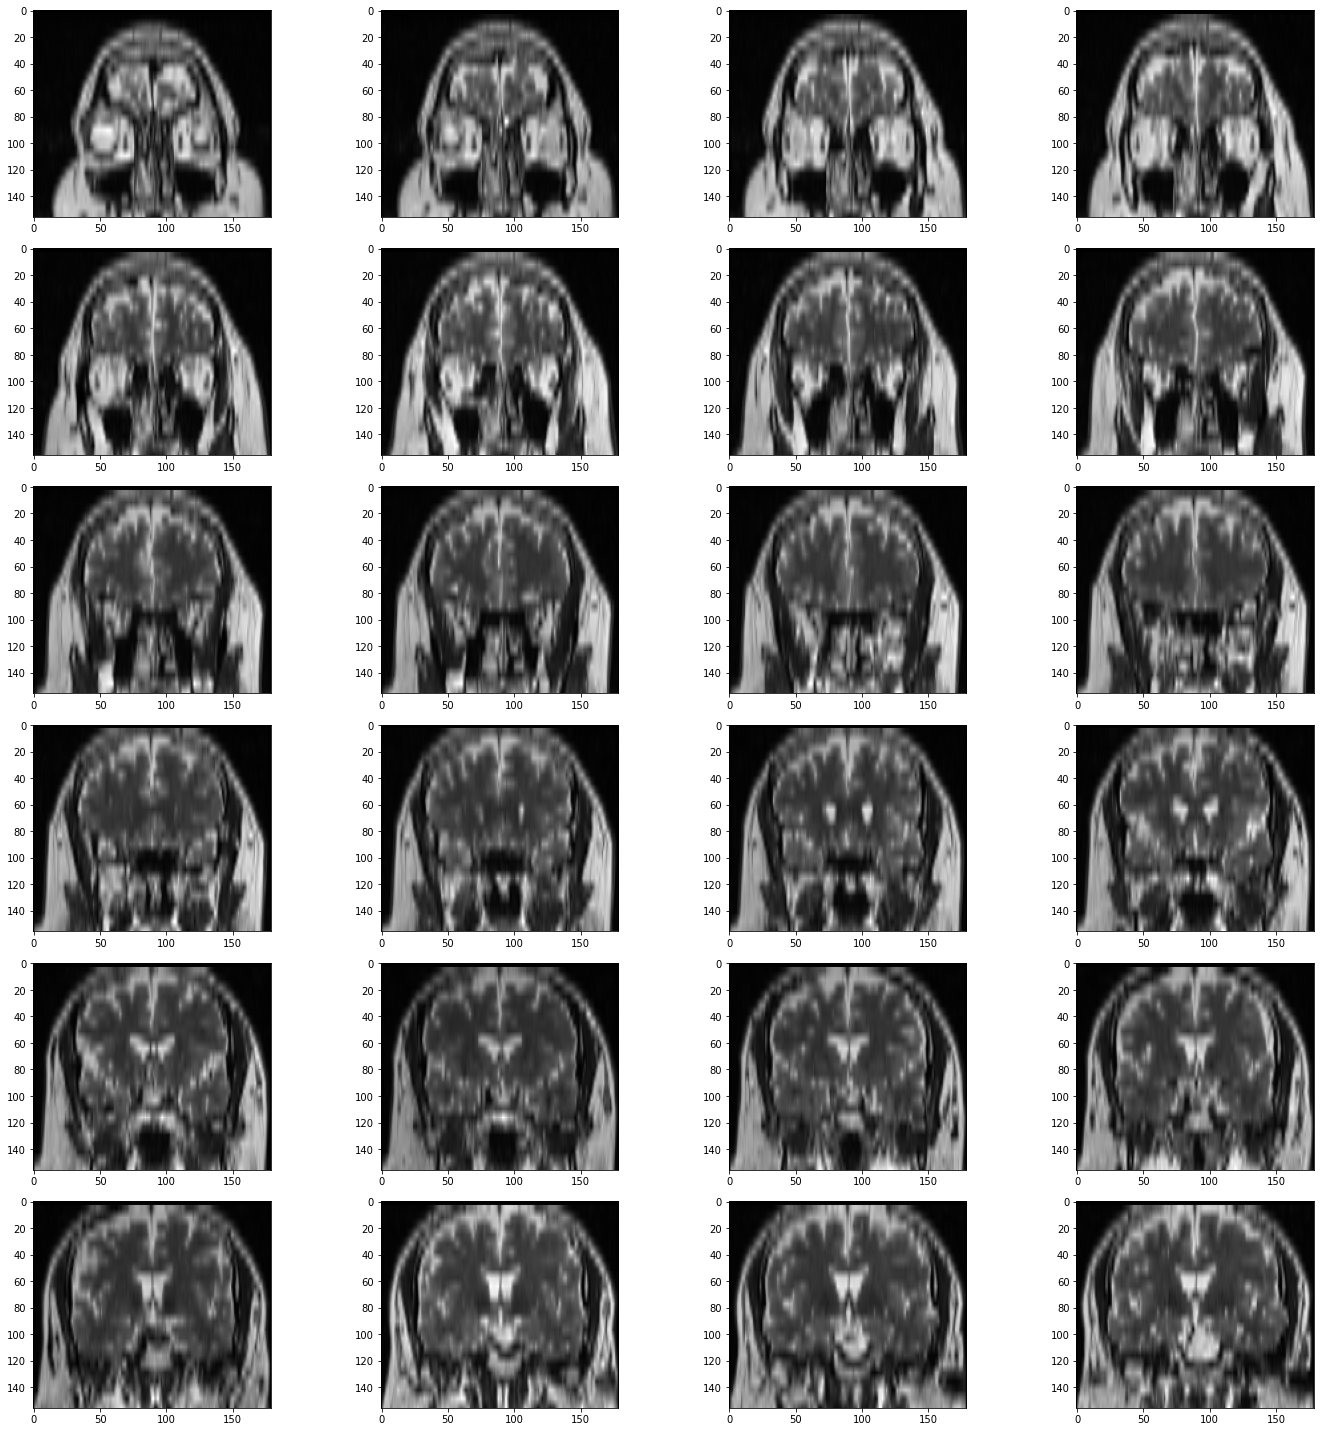

In [37]:
re_arr = sitk.GetArrayFromImage(resampled_img)
# axial_arr = np.transpose(re_arr, (1,2,0))  # sagittal to axial
axial_arr = np.transpose(re_arr, (1, 0, 2))
axial_arr = np.fliplr(axial_arr)
print(axial_arr.shape)
axes=[]
fig = plt.figure(figsize=(20,20))
for i in range(24):
  axes.append(fig.add_subplot(6,4,i+1))
  plt.imshow(axial_arr[30+3*i], cmap='gray')
fig.tight_layout()
plt.show()

#### 리사이즈

In [34]:
# Resize
def resize_array(sitk_image, size,interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [(ospc * osz / nsz) for osz, ospc, nsz in
                   zip(original_size, original_spacing, size)]
    sitk_image = sitk.Resample(sitk_image, size, sitk.Transform(), interpolator, 
                               sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

In [35]:
resize_img = resize_array(mri_series_T2, (512,512,24))
resize_img.GetSize(), resize_img.GetSpacing()

((512, 512, 24), (0.34912109375, 0.4296875, 6.499999911226571))

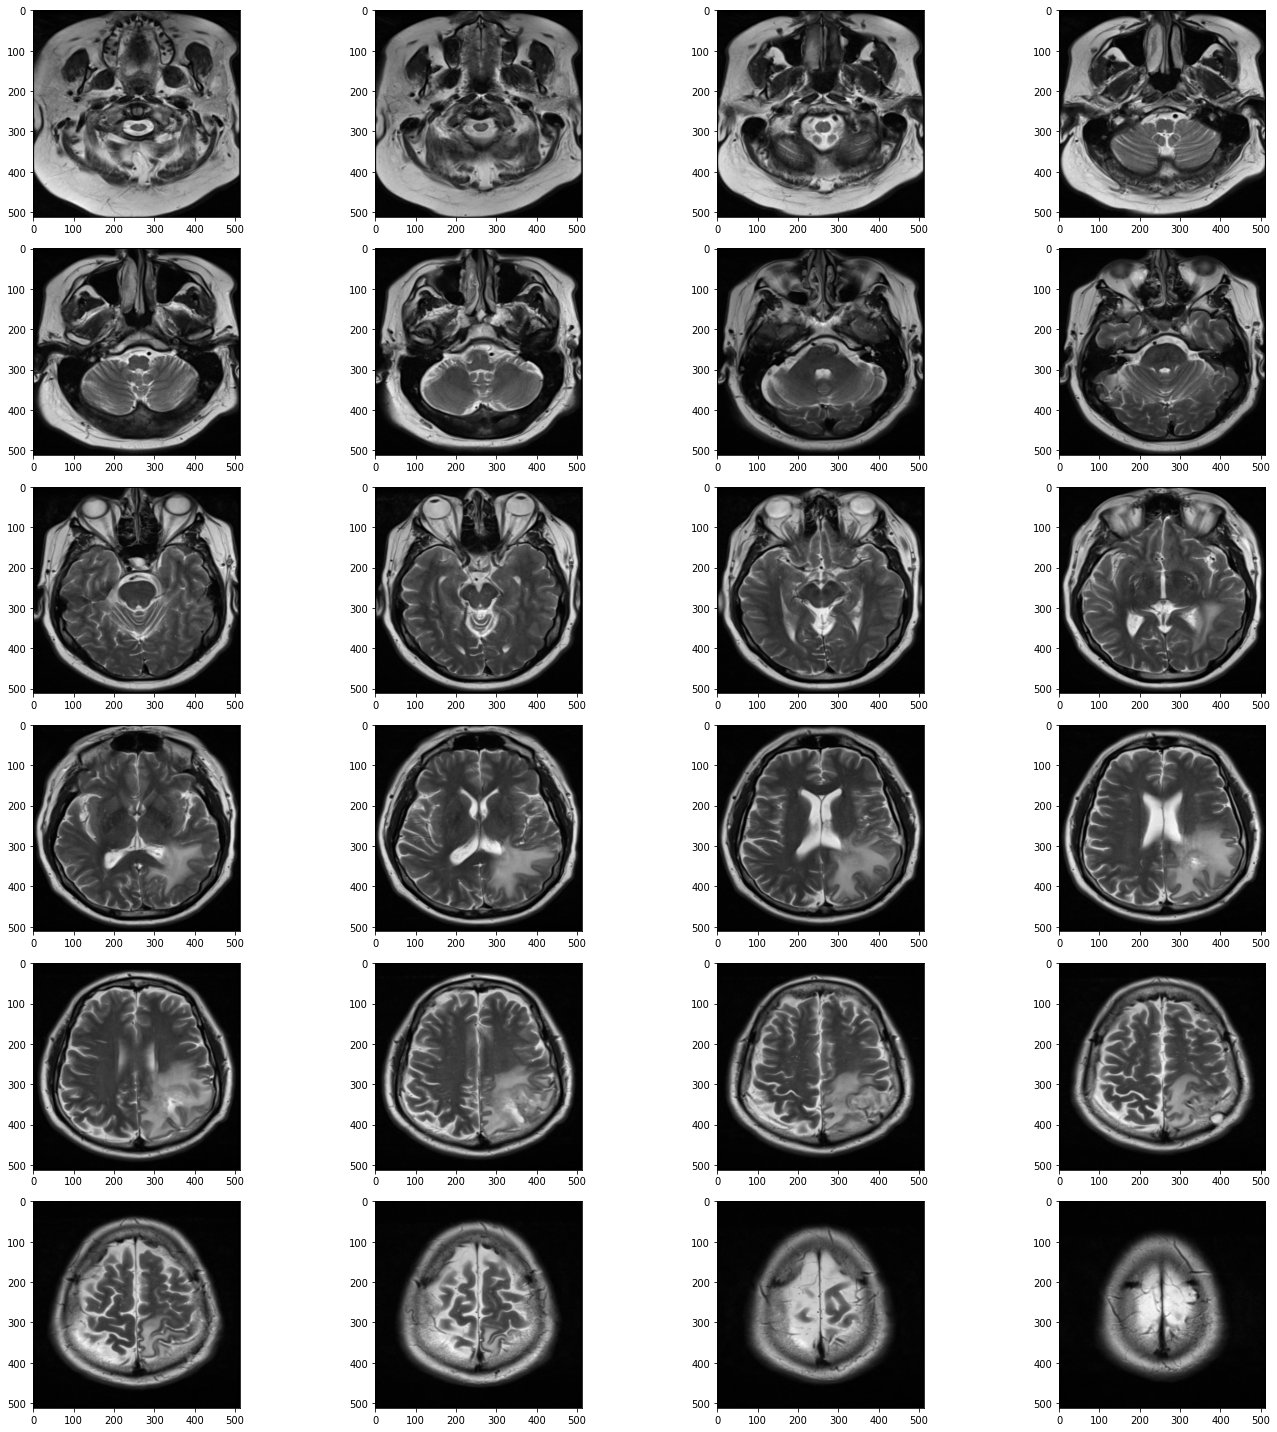

In [36]:
display(sitk.GetArrayFromImage(resize_img))

#### MRI 여러 시퀀스를 하나의 데이터로 만드는 방법

In [31]:
os.listdir('./Deepnoid-Education/dataset/MRI')

['readme.md',
 '5388.000000-MaskTumor-63335',
 '34907.000000-T1prereg-43695',
 '37908.000000-T2reg-21119',
 '35623.000000-FLAIRreg-79237',
 '11.000000-T1post-80644']

In [32]:
case3_t1 = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644')
case3_t2 = series_load('./Deepnoid-Education/dataset/MRI/37908.000000-T2reg-21119')

print(case3_t1.GetSize(), case3_t2.GetSize())


(260, 320, 24) (260, 320, 24)


In [33]:
t1_arr = sitk.GetArrayFromImage(case3_t1)
t2_arr = sitk.GetArrayFromImage(case3_t2)

t1_arr = np.expand_dims(t1_arr, axis=-1)
t2_arr = np.expand_dims(t2_arr, axis=-1)

print(t1_arr.shape, t2_arr.shape)

case3_arr = np.concatenate((t1_arr,t2_arr), -1)

print(case3_arr.shape)

(24, 320, 260, 1) (24, 320, 260, 1)
(24, 320, 260, 2)


#### label data 확인

In [39]:
label = series_load('./Deepnoid-Education/dataset/MRI/5388.000000-MaskTumor-63335')
label.GetSize()

(260, 320, 24)

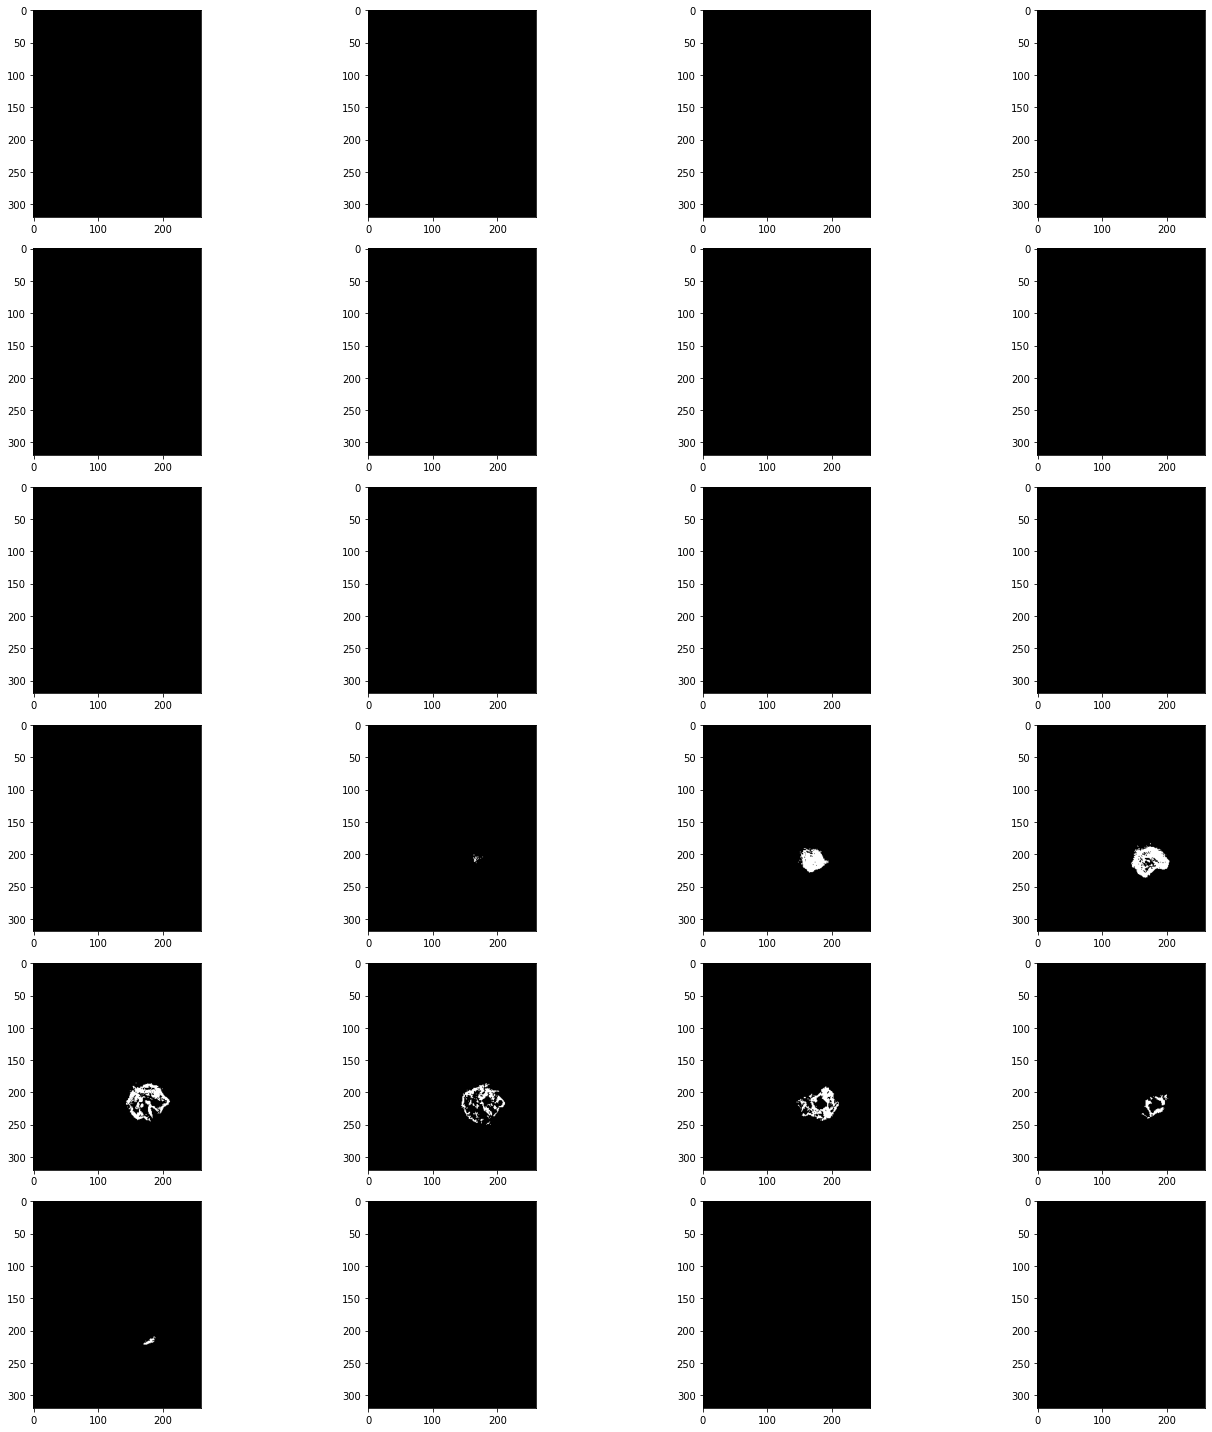

In [40]:
display(sitk.GetArrayFromImage(label))

In [41]:
label_arr = sitk.GetArrayFromImage(label)
print(np.unique(label_arr, return_counts=True))

(array([0, 1], dtype=uint16), array([1989991,    6809]))


In [42]:
os.getcwd()

'/content'

In [43]:
sitk.WriteImage(label, './CT_label.nii.gz')

#### dicom & label check

In [44]:
dicom = sitk.ReadImage('./Deepnoid-Education/dataset/data.nii.gz')
dicom = sitk.GetArrayFromImage(dicom)
print(dicom.shape)

nifti = sitk.ReadImage('./Deepnoid-Education/dataset/label.nii.gz')
nifti = sitk.GetArrayFromImage(nifti)
print(nifti.shape)

(96, 512, 512)
(96, 512, 512)


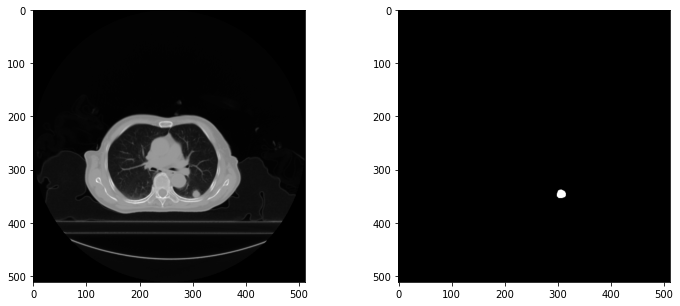

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(dicom[48], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(nifti[48], cmap='gray')